In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [31]:
df = pd.read_csv("RDC_Inventory_Core_Metrics_Zip_History.csv")
print(len(df))

2910218


In [32]:
maine_entries = df["zip_name"].str.contains(", me") & ~df["zip_name"].isnull()
df = df[maine_entries]
print(len(df))

38888


In [35]:
portland_entries = df["zip_name"].str.contains("portland")
print(len(df[portland_entries]))
df[portland_entries]

595


,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
4303,202410,4961,"new portland, me",284728.0,0.4888,0.0308,10.0,0.1111,-0.1304,51.0,...,345113.0,0.0756,-0.0226,13.0,0.0417,0.0000,0.3000,-0.0333,0.1696,0.0
8058,202410,4103,"portland, me",550975.0,-0.0697,-0.0004,48.0,0.1585,0.9388,53.0,...,625400.0,-0.0364,-0.0496,60.0,0.2020,0.9833,0.2421,0.0348,-0.0028,1.0
10368,202410,4101,"portland, me",786225.0,0.0251,-0.1215,58.0,0.0000,-0.0574,63.0,...,1069024.0,0.0482,0.0109,67.0,-0.0075,0.0231,0.1826,0.0174,0.1088,1.0
13853,202410,4109,"portland, me",950000.0,0.0201,0.1018,3.0,-0.1429,0.5000,139.0,...,1125000.0,0.0286,0.4122,5.0,0.2500,1.5000,0.6667,0.2381,NaN,1.0
25328,202410,4102,"portland, me",718750.0,0.0994,0.0833,46.0,0.0111,1.2195,62.0,...,1047663.0,0.0561,0.1180,62.0,0.0973,1.3846,0.3297,0.1074,0.0858,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888500,201607,4102,"portland, me",325000.0,NaN,NaN,47.0,NaN,NaN,45.0,...,483241.0,NaN,NaN,59.0,NaN,NaN,0.2553,NaN,NaN,NaN
2893166,201607,4109,"portland, me",502450.0,NaN,NaN,20.0,NaN,NaN,89.0,...,561660.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2900323,201607,4961,"new portland, me",133200.0,NaN,NaN,20.0,NaN,NaN,87.0,...,216823.0,NaN,NaN,21.0,NaN,NaN,0.0500,NaN,NaN,NaN
2905705,201607,4106,"south portland, me",279450.0,NaN,NaN,47.0,NaN,NaN,35.0,...,360883.0,NaN,NaN,67.0,NaN,NaN,0.4255,NaN,NaN,NaN


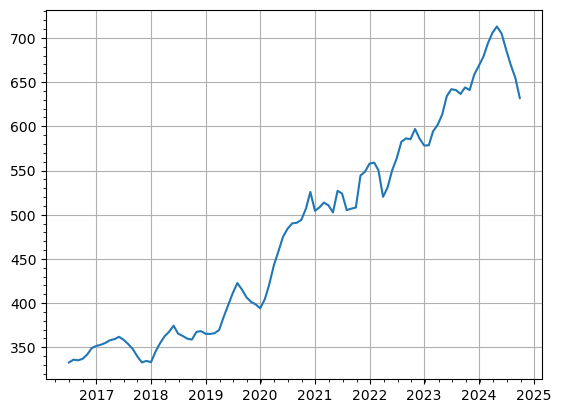

In [105]:
df_filter = df[portland_entries]
dt_list = [dt.date(int(str(x)[:4]), int(str(x)[-2:]), 1) for x in df_filter["month_date_yyyymm"]]
df_filter.loc[:, "dt_date"] = dt_list



df_filter = df_filter[["dt_date", "median_listing_price"]]
df_filter = df_filter.groupby("dt_date", as_index=False).mean()



from scipy.ndimage import uniform_filter1d

y = df_filter["median_listing_price"]/10**3
x = np.arange(len(y))
y = uniform_filter1d(y, size=5)

plt.figure()
plt.grid()
plt.minorticks_on()
plt.plot(df_filter["dt_date"], y)


In [ ]:
7780,000,000 - 2017


In [107]:
600/340

1.7647058823529411

In [ ]:
14,879,000,00 - 2023

1.9

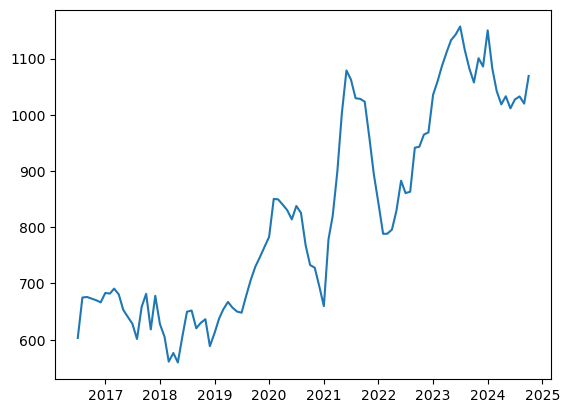

In [85]:
zip_entries = (df["postal_code"] == 4101)
df_filter = df[zip_entries]

dt_list = [dt.date(int(str(x)[:4]), int(str(x)[-2:]), 1) for x in df_filter["month_date_yyyymm"]]
df_filter.loc[:, "dt_date"] = dt_list

plt.plot(df_filter["dt_date"], df_filter["average_listing_price"]/10**3)